In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import ArmaProcess

from sklearn.model_selection import train_test_split

In [23]:
df_res = pd.read_csv('UK_results-20200503-150942.csv') # from bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide
df_mob = pd.read_csv('UK_mobility_results-20200503-152437.csv') # from bigquery-public-data.covid19_google_mobility.mobility_report

In [24]:
df_res.head()

,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2018
0,2019-12-31,31,12,2019,0,0,0,0,United_Kingdom,UK,GBR,66488991
1,2020-01-01,1,1,2020,0,0,0,0,United_Kingdom,UK,GBR,66488991
2,2020-01-02,2,1,2020,0,0,0,0,United_Kingdom,UK,GBR,66488991
3,2020-01-03,3,1,2020,0,0,0,0,United_Kingdom,UK,GBR,66488991
4,2020-01-04,4,1,2020,0,0,0,0,United_Kingdom,UK,GBR,66488991


In [25]:
df_mob.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,GB,United Kingdom,NaN,NaN,4/2/2020,-75.0,-32.0,-24.0,-73.0,-70.0,29.0
1,GB,United Kingdom,NaN,NaN,4/3/2020,-76.0,-30.0,-25.0,-72.0,-69.0,29.0
2,GB,United Kingdom,NaN,NaN,4/10/2020,-78.0,-33.0,-18.0,-75.0,-80.0,32.0
3,GB,United Kingdom,NaN,NaN,4/13/2020,-78.0,-41.0,-21.0,-78.0,-83.0,31.0
4,GB,United Kingdom,NaN,NaN,4/17/2020,-75.0,-30.0,-33.0,-71.0,-68.0,29.0


In [26]:
# Safety first
df_res2 = df_res.copy()

In [27]:
df_res = df_res2.copy()

In [28]:
# Set date column into index
df_res = df_res.set_index(['date'])
df_res.index = pd.to_datetime(df_res.index)

In [29]:
# slice dataframe because we use time series model so it only need 1 columns (of independent variables)
df_res = df_res.iloc[:, 3]
df_res.head(3)

date
2019-12-31    0
2020-01-01    0
2020-01-02    0
Name: daily_confirmed_cases, dtype: int64

Text(0, 0.5, 'Amount')

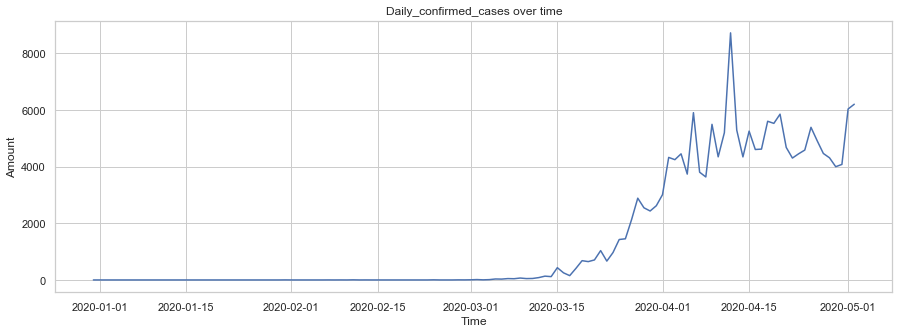

In [30]:
# Observed Daily confirmed Cases
plt.figure(figsize=(15, 5))
plt.plot(df_res)
plt.title('Daily_confirmed_cases over time')
plt.xlabel('Time')
plt.ylabel('Amount')

## Train and Test Split

In [31]:
daily_diff = df_res.diff()
daily_diff = daily_diff.dropna()
# Compute autocorrelation of daily different of confirmed cases
autocorr_daily = daily_diff.autocorr()
print("The autocorrelation of daily confirmed cases\
 is %4.2f" %(autocorr_daily))

The autocorrelation of daily confirmed cases is -0.30


In [32]:
train = daily_diff[:100]
test = daily_diff[100:]

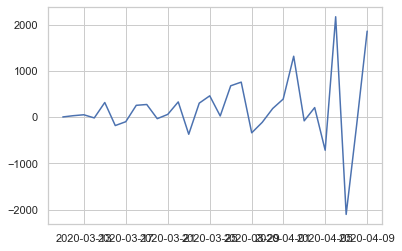

In [33]:
# plot to see if the confirmed cases is always up (check if it not cumulative)
plt.plot(train[70:])

C:\Users\theka\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


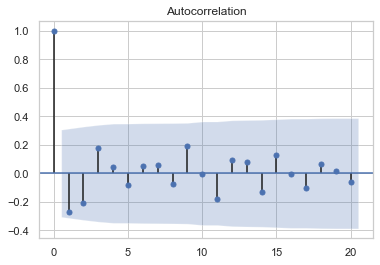

In [36]:
# define only 20 lags for plot and 95 % confidence interval
train_acf = acf(train)
plot_acf(train_acf, lags = 20, alpha = 0.05)
plt.show()

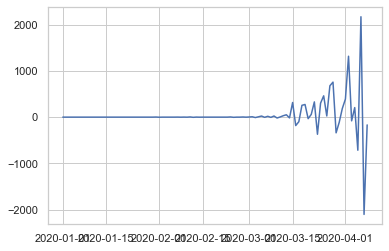

In [19]:
daily_diff = daily_diff.dropna()
plt.plot(daily_diff)